In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score
)
from sklearn.model_selection import (StratifiedKFold, cross_validate)
warnings.filterwarnings('ignore')

### Load Data

In [3]:
X_train = np.load('artifacts/X_train.npz')['X_train']
X_test = np.load('artifacts/X_test.npz')['X_train']
Y_train = np.load('artifacts/Y_train.npz')['X_train']
Y_test = np.load('artifacts/Y_test.npz')['X_train']

### Define Multi-Models

In [6]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

### Configure K-Fold Cross-Validation

In [8]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

In [14]:
trained_model = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    cv_results = cross_validate(model, X_train, Y_train, cv=cv, scoring='f1', return_train_score=False, return_estimator=True)

    test_score = cv_results['test_score']
    best_fold_idx = np.argmax(cv_results['test_score'])
    estimator = cv_results['estimator'][best_fold_idx]

    print(estimator)

    trained_model[model_name] = estimator

Training Logistic Regression...
LogisticRegression(max_iter=1000, random_state=42)
Training Decision Tree...
DecisionTreeClassifier(random_state=42)
Training Random Forest...
RandomForestClassifier(random_state=42)


In [15]:
Y_hat_test = {}

for model_name, model in trained_model.items():
    Y_hat_test[model_name] = model.predict(X_test)

Y_hat_test

{'Logistic Regression': array([0, 0, 0, ..., 0, 0, 1], shape=(1999,)),
 'Decision Tree': array([0, 1, 0, ..., 1, 0, 1], shape=(1999,)),
 'Random Forest': array([0, 0, 0, ..., 1, 0, 1], shape=(1999,))}

In [16]:
cm1 = confusion_matrix(Y_test, Y_hat_test['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_test['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_test['Random Forest'])

Text(1180.4281045751634, 0.5, 'Actual')

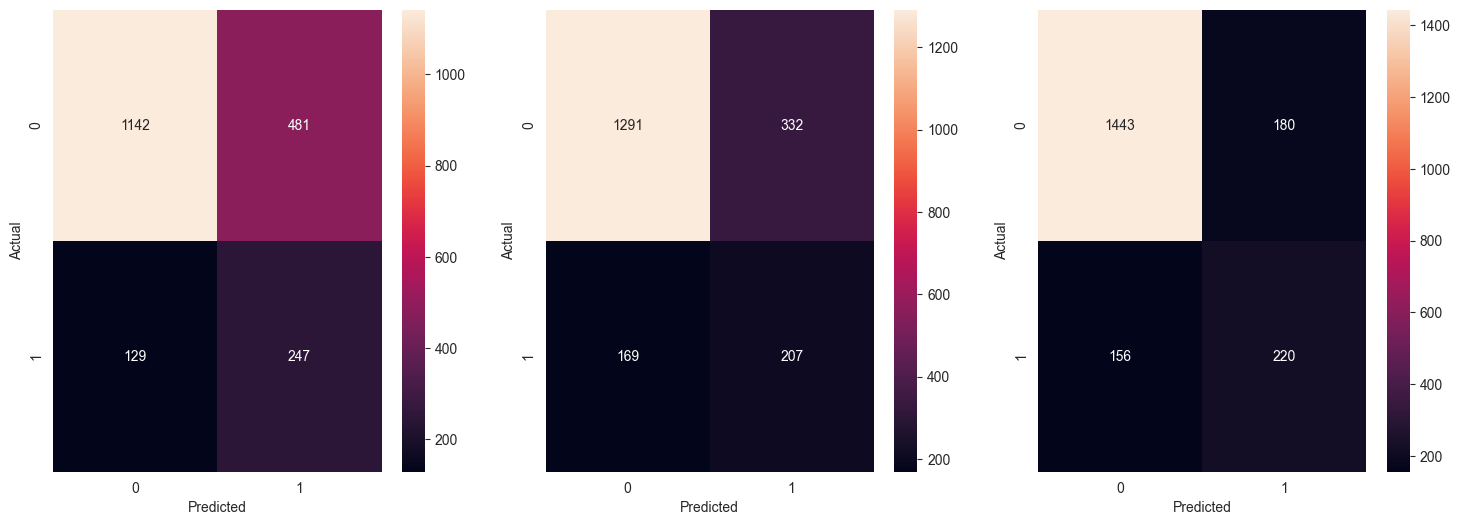

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')